# Predicting Bank Product Uptake
by VICTOR

## Problem Statement
In the banking industry, banks do carry out a plethora of marketing campaigns to introduce new products. Sometimes, the customers don't subscribe to the offers being marketed to them and this takes a toll on the bank with regard to funds been used to market such a product.

Based on this, the need to actually know if customers will signup for a product being released and also target those exact customers is very important.

## Project Objective
The goal of this project is to build a machine learning model that is able to predict if customers will subscribe to term deposit.


In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data Inspection

### Structure of dataset
- The dataset was gotten from Kaggle.
- Dataset contains 4522 rows and 17 columns.
- There were no missing values in the dataset.
- A significant feature in the datset is that all the columns have data type of object, even where the values are integers

#### Features in the dataset and meaning

  - age (numeric)
  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  - education (categorical: "unknown","secondary","primary","tertiary")
  - default: has credit in default? (binary: "yes","no")
  - balance: average yearly balance, in euros (numeric) 
  - housing: has housing loan? (binary: "yes","no")
  - loan: has personal loan? (binary: "yes","no")
  
   #### related with the last contact of the current campaign:
   
  - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  - day: last contact day of the month (numeric)
  - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - duration: last contact duration, in seconds (numeric)
  
   #### other attributes:
  - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  - previous: number of contacts performed before this campaign and for this client (numeric)
  - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (**desired target**):
  - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


#### Renaming the Columns

In [4]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [5]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In the 2 cells above, I was trying to get a header for each column since it was muffled within the initial dataset.

In [6]:
#inspect the data
#checking for null or missing values

data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#from here, we can see that some integers are recorded as strings; this is to be corrected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [8]:
# This gives me the value of rows and columns
data.shape

(4521, 17)

In [9]:
#This argument lists out all the column headers.
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
#This gives a statistical outlook on the dataset
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,67,12,3,4,2,2353,2,2,3,31,12,875,32,292,24,4,2
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


In [95]:
data.head(45)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [86]:
data.tail(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4507,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,29,aug,85,4,-1,0,unknown,no
4508,33,services,married,secondary,no,288,yes,no,cellular,17,apr,306,1,-1,0,unknown,no
4509,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
4510,51,technician,married,tertiary,no,2506,no,no,cellular,30,nov,210,3,-1,0,unknown,no
4511,36,technician,divorced,secondary,no,566,yes,no,unknown,20,may,129,2,-1,0,unknown,no
4512,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4513,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4514,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4516,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no


In [96]:
job_y = data[["job", "y"]]
job_y.head(15)

,job,y
1,unemployed,no
2,services,no
3,management,no
4,management,no
5,blue-collar,no
6,management,no
7,self-employed,no
8,technician,no
9,entrepreneur,no
10,services,no


In [122]:
age_y = data[["age", "job", "education", "balance", "housing","loan","poutcome", "y"]]
age_y.head(55)

,age,job,education,balance,housing,loan,poutcome,y
1,30,unemployed,primary,1787,no,no,unknown,no
2,33,services,secondary,4789,yes,yes,failure,no
3,35,management,tertiary,1350,yes,no,failure,no
4,30,management,tertiary,1476,yes,yes,unknown,no
5,59,blue-collar,secondary,0,yes,no,unknown,no
6,35,management,tertiary,747,no,no,failure,no
7,36,self-employed,tertiary,307,yes,no,other,no
8,39,technician,secondary,147,yes,no,unknown,no
9,41,entrepreneur,tertiary,221,yes,no,unknown,no
10,43,services,primary,-88,yes,yes,failure,no


In [123]:
age_y.tail(55)

,age,job,education,balance,housing,loan,poutcome,y
4467,61,management,secondary,967,no,no,unknown,no
4468,43,unemployed,secondary,1577,yes,no,unknown,no
4469,42,housemaid,primary,1,yes,no,unknown,no
4470,36,management,tertiary,0,no,no,unknown,no
4471,31,technician,tertiary,1166,yes,no,unknown,no
4472,59,management,unknown,3534,no,no,unknown,no
4473,29,blue-collar,primary,200,yes,no,unknown,no
4474,33,technician,secondary,4790,yes,no,failure,no
4475,44,blue-collar,primary,-237,yes,no,unknown,no
4476,43,blue-collar,secondary,1335,yes,no,unknown,no


In [87]:
data.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [94]:
data['y'].describe()

count     4521
unique       2
top         no
freq      4000
Name: y, dtype: object

In [12]:
# Creating a copy of the dataset to preserve the original data.
df = data.copy()

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [13]:
#Converting some strings into integers.
df[["age", "balance","day", "duration", "campaign", "pdays", "previous"]] = df[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]].apply(pd.to_numeric)

In [14]:
# Confirming if some Strings are rightly converted into Integers
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
#This gives an updated statistical outlook on the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
# Renaming Columns
df.rename(columns = {'housing':'housing_loan', 'loan':'personal_loan',
                              'pdays':'last_day_of_contact', 'previous':'previous_contacting', 'poutcome':'marketing_outcome', 'y':'subscribed?'}, inplace = True)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis


Text(0, 0.5, 'Frequency')

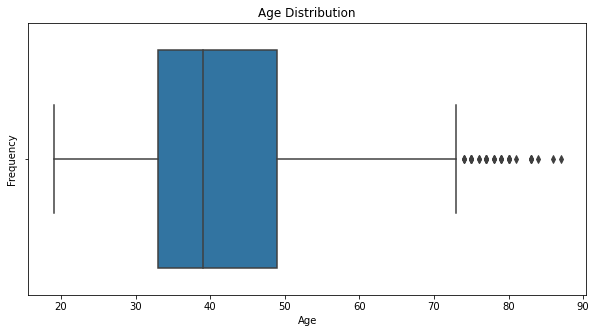

In [18]:
#Univariate Analysis for Age Distribution with BoxPlot
plt.figure(figsize=(10,5))
plt.title('Age Distribution')
sns.boxplot(x='age', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')


In [19]:
df['age'].value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [20]:
df['age'].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

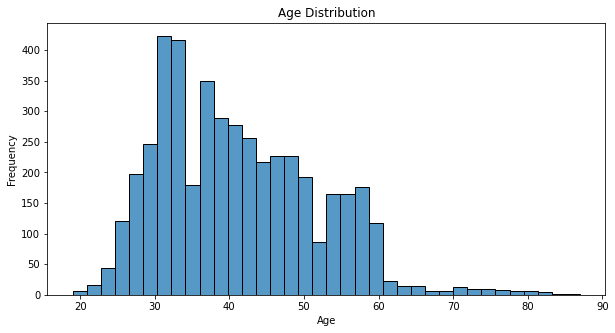

In [21]:
#univariate analysis of Age Distribution Using a Histogram

plt.figure(figsize=(10,5))
plt.title('Age Distribution')
sns.histplot(x='age', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')


In [22]:
#IN VIEW OF HOW THESE CHARTS LOOK, IT WOULD BE BETTER TO GROUP THE AGES

def age_bracket(age):
    if age <= 29:
        return 'Youth(19-29)'
    elif age <= 40:
        return 'Older Youth(30-40)'
    elif age<= 51:
        return 'Matured(41-51)'
    elif age<=62:
        return 'Adults(52-62)'
    elif age<= 73:
        return 'Older Adults(63-73)'
    elif age<=84:
        return 'Aged(74-84)'
    else:
        return 'Silver Tops(>85)'
    
#Creating a new column for age category
df['age_group'] = df['age'].apply(age_bracket)
        

Text(0, 0.5, 'Age Group')

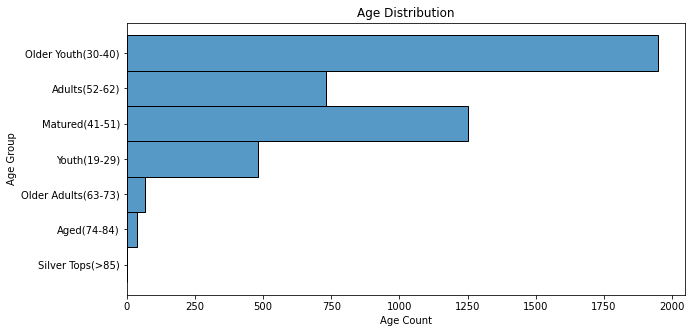

In [23]:
#Histogram plot for Age Group
plt.figure(figsize=(10,5))
plt.title('Age Distribution')
sns.histplot(y='age_group', data=df)
plt.xlabel('Age Count')
plt.ylabel('Age Group')

In [24]:
df['age_group'].value_counts()

Older Youth(30-40)     1950
Matured(41-51)         1253
Adults(52-62)           732
Youth(19-29)            482
Older Adults(63-73)      66
Aged(74-84)              36
Silver Tops(>85)          2
Name: age_group, dtype: int64

Majority of the clients are within the age range of 31 - 41 years and were categorized as Older Youth.

In [25]:
df.head(20)

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Older Youth(30-40)
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Older Youth(30-40)
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Older Youth(30-40)
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Older Youth(30-40)
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Adults(52-62)
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no,Older Youth(30-40)
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,Older Youth(30-40)
8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,Older Youth(30-40)
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,Matured(41-51)
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no,Matured(41-51)


Text(0, 0.5, 'Count')

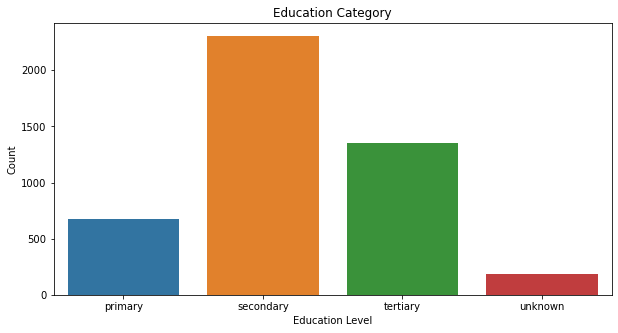

In [26]:
#Education Category
plt.figure(figsize=(10,5))
plt.title('Education Category')
sns.countplot(x='education', data=df)
plt.xlabel('Education Level')
plt.ylabel('Count')

Checking the educational level of the bank's customers.

Text(0, 0.5, 'Count')

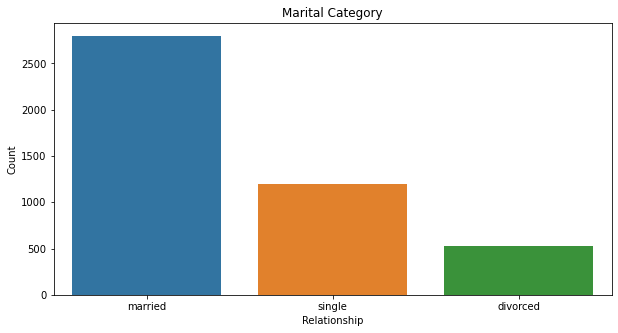

In [27]:
#Marital Relationship Chart
plt.figure(figsize=(10,5))
plt.title('Marital Category')
sns.countplot(x='marital', data=df)
plt.xlabel('Relationship')
plt.ylabel('Count')

The relationship status distribution of the bank's clients.

Text(0, 0.5, 'Count')

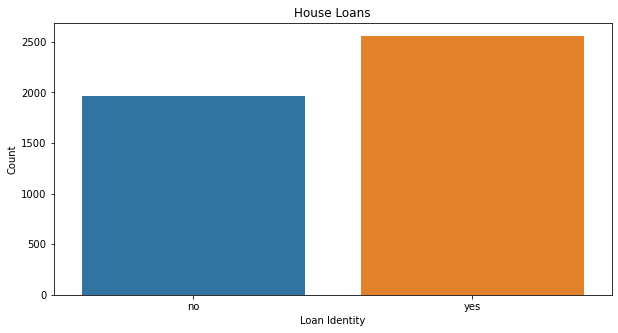

In [28]:
#Count Plot for Customer House Loan 
plt.figure(figsize=(10,5))
plt.title('House Loans')
sns.countplot(x='housing_loan', data=df)
plt.xlabel('Loan Identity')
plt.ylabel('Count')

From this, it is visible that more customers have house loan.

Text(0, 0.5, 'Count')

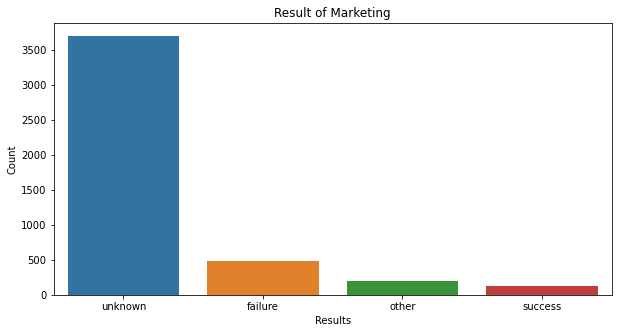

In [29]:
#Marketing Outcome Chart
plt.figure(figsize=(10,5))
plt.title('Result of Marketing')
sns.countplot(x='marketing_outcome', data=df)
plt.xlabel('Results')
plt.ylabel('Count')

In [30]:
df['marketing_outcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: marketing_outcome, dtype: int64

Text(0.5, 0, 'Count')

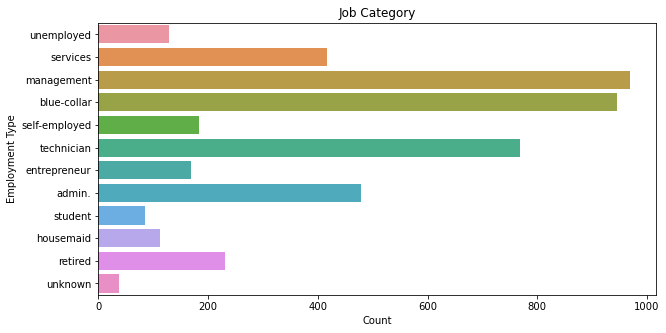

In [31]:
# Job Category Countplot
plt.figure(figsize=(10,5))
plt.title('Job Category')
sns.countplot(y='job', data=df)
plt.ylabel('Employment Type')
plt.xlabel('Count')

Management is the highest job type closely followed by blue-collar. Students and unknown represent the least job type.

<AxesSubplot:xlabel='personal_loan', ylabel='count'>

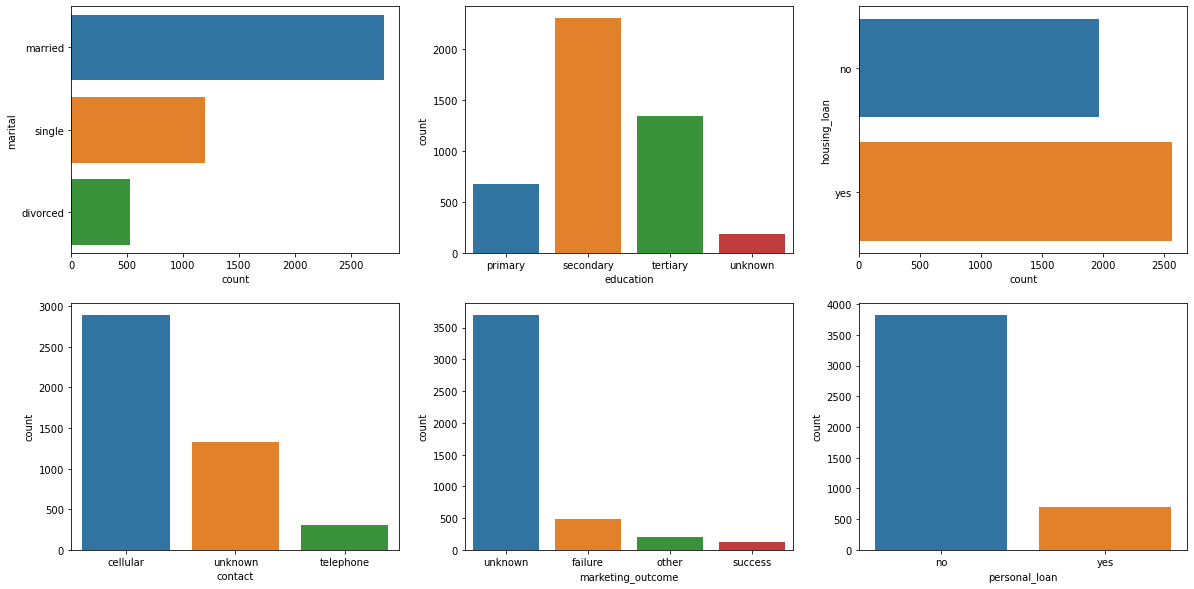

In [32]:
#Subplots for Marital, Education, Housing_Loan, Personal Loan, Marketing Outcome
fig, axes = plt.subplots(2,3, figsize = (20,10))
sns.countplot(y='marital', data=df, ax= axes[0,0])
sns.countplot(x='education',data=df, ax= axes[0,1])
sns.countplot(y='housing_loan',data=df, ax= axes[0,2])
sns.countplot(x='contact', data=df, ax= axes[1,0])
sns.countplot(x='marketing_outcome', data=df, ax= axes[1,1])
sns.countplot(x='personal_loan', data=df, ax= axes[1,2])


Subplots for Marital, Education, Housing_Loan, Personal Loan, Marketing Outcome.

## Bivariate Analysis


In [33]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Older Youth(30-40)
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Older Youth(30-40)
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Older Youth(30-40)
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Older Youth(30-40)
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Adults(52-62)


Text(0, 0.5, 'Count')

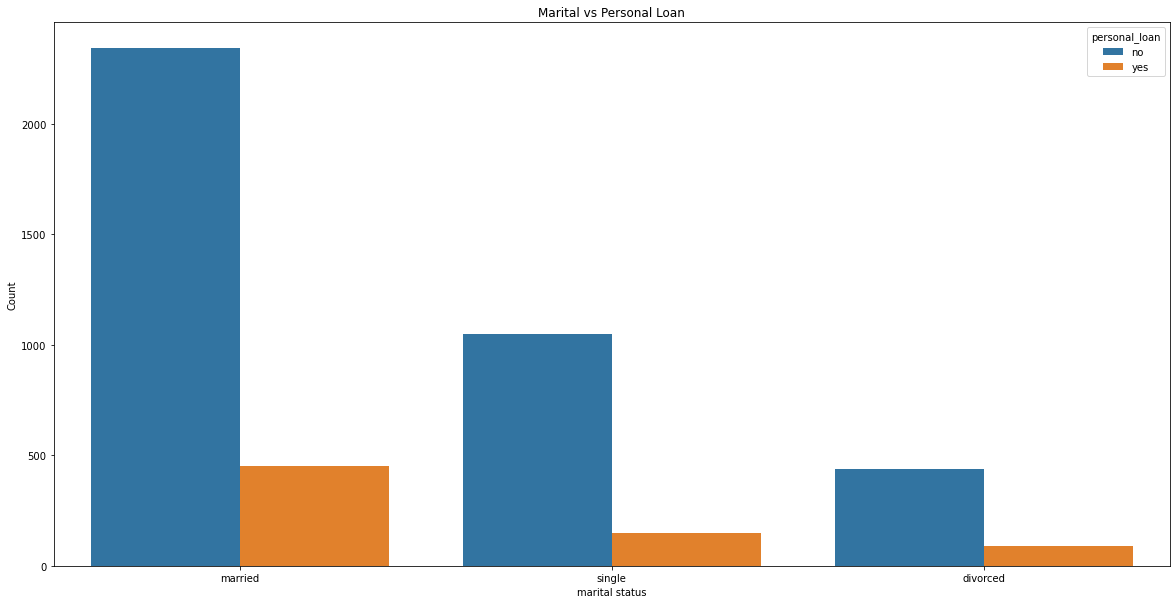

In [34]:
# marital v personal loan
plt.figure(figsize=(20,10))
plt.title('Marital vs Personal Loan')
sns.countplot(x='marital', data=df, hue='personal_loan')
plt.xlabel('marital status')
plt.ylabel('Count')

In [35]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

More married people have collected personal loans compared to single and divorced with divorced being the least.

Text(0, 0.5, 'Count')

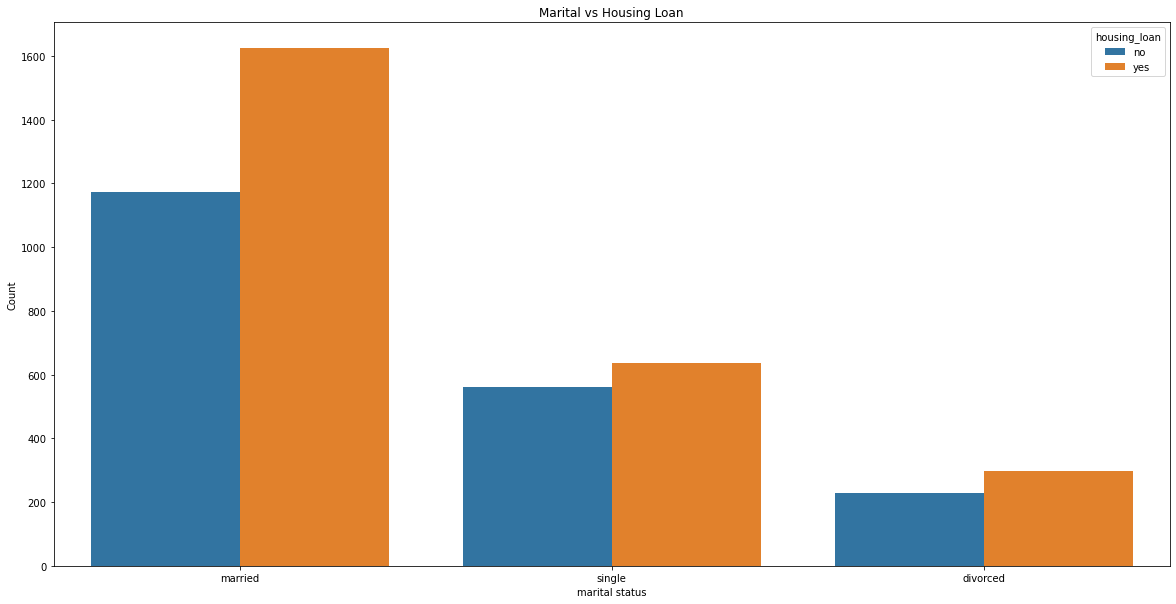

In [36]:
# marital v housing loan
plt.figure(figsize=(20,10))
plt.title('Marital vs Housing Loan')
sns.countplot(x='marital', data=df, hue='housing_loan')
plt.xlabel('marital status')
plt.ylabel('Count')

In [37]:
df['housing_loan'].value_counts()

yes    2559
no     1962
Name: housing_loan, dtype: int64

Again, more married people have collected personal loans compared to single and divorced with divorced being the least.


Text(0, 0.5, 'Count')

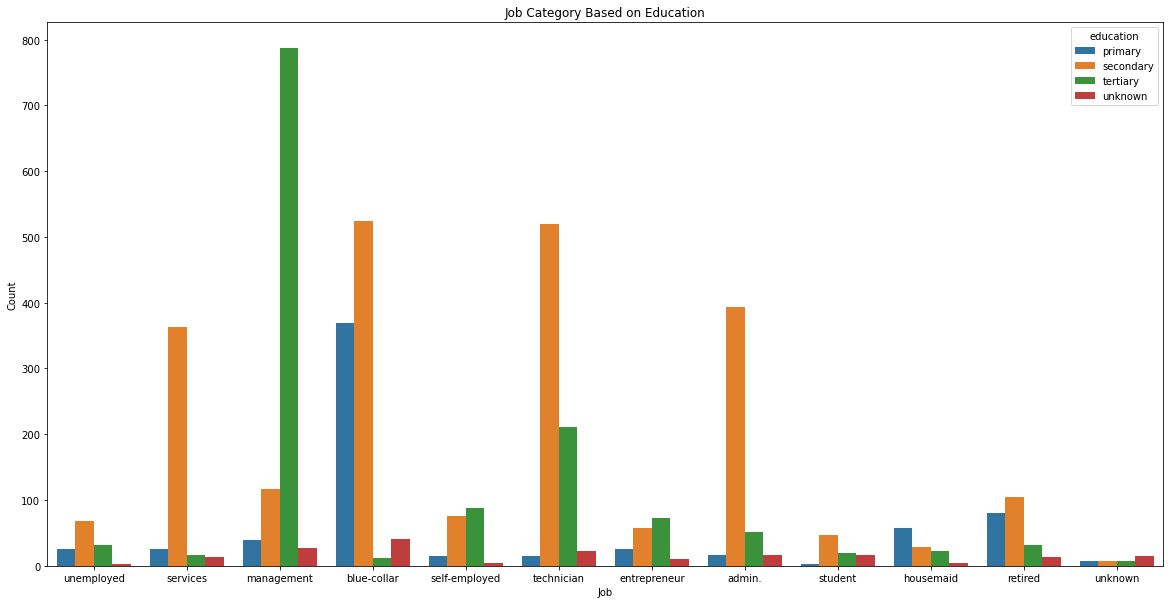

In [38]:
# job vs education
plt.figure(figsize=(20,10))
plt.title('Job Category Based on Education')
sns.countplot(x='job', data=df, hue='education')
plt.xlabel('Job')
plt.ylabel('Count')


Most of the customers in management positions have tertiary eduction background.

Text(0, 0.5, 'Count')

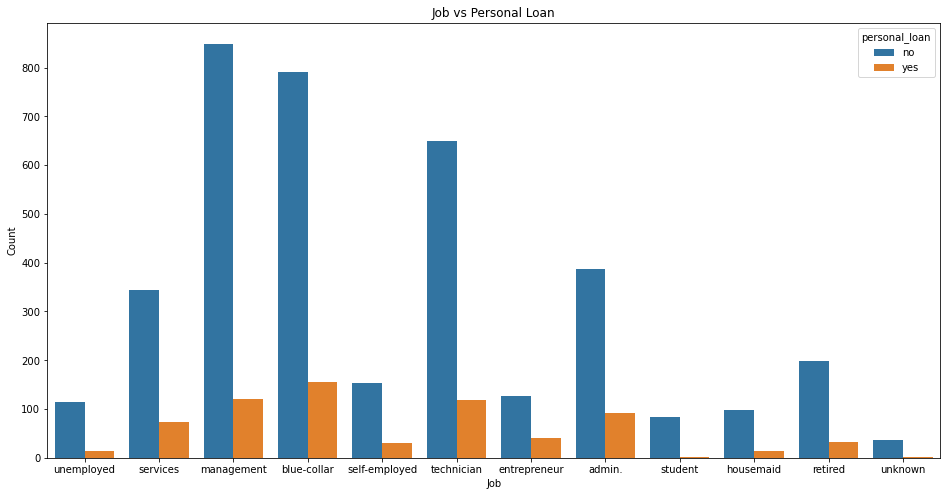

In [39]:
#Job against Personal Loan
plt.figure(figsize=(16,8))
plt.title('Job vs Personal Loan')
sns.countplot(x='job', data=df, hue='personal_loan')
plt.xlabel('Job')
plt.ylabel('Count')


Blue Collar job owners have the most personal loan, as displayed on the chart.

Text(0, 0.5, 'Count')

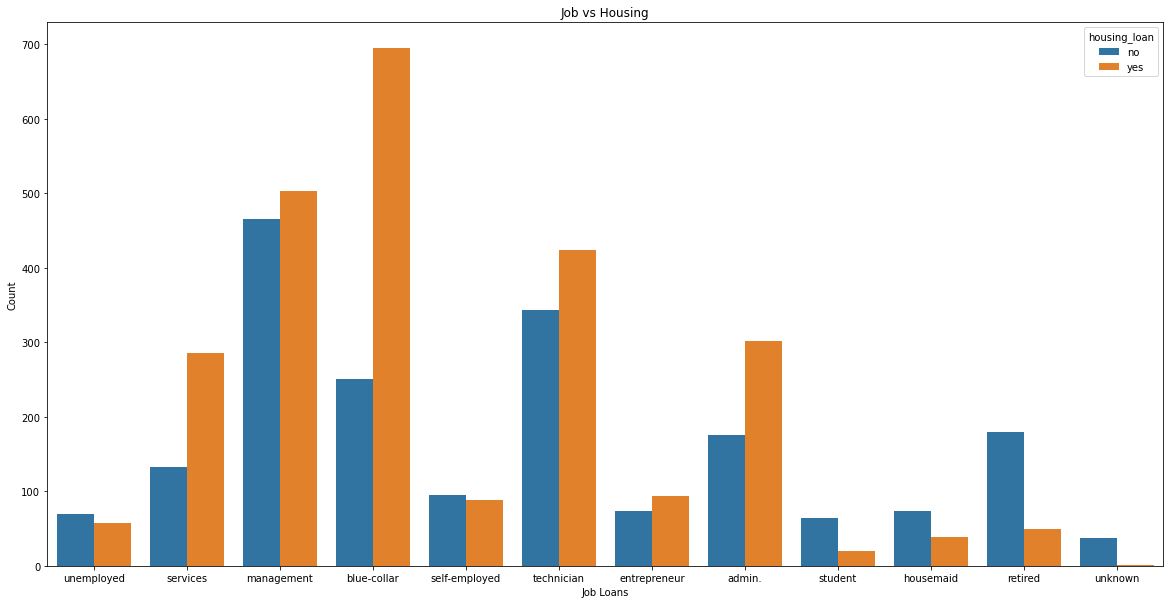

In [40]:
#Jobs vs Housing Loan
plt.figure(figsize=(20,10))
plt.title('Job vs Housing')
sns.countplot(x='job', data=df, hue='housing_loan')
plt.xlabel('Job Loans')
plt.ylabel('Count')

Blue collar job owners also, have more housing loans.

Text(0, 0.5, 'Count')

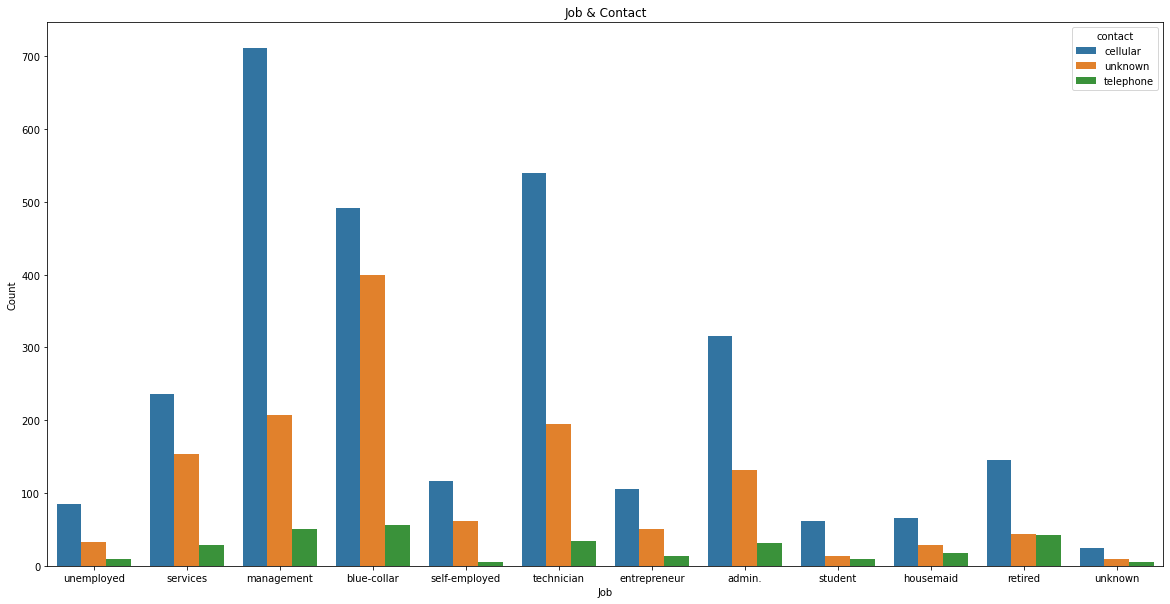

In [41]:
# job vs contact
plt.figure(figsize=(20,10))
plt.title('Job & Contact')
sns.countplot(x='job', data=df, hue='contact')
plt.xlabel('Job')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

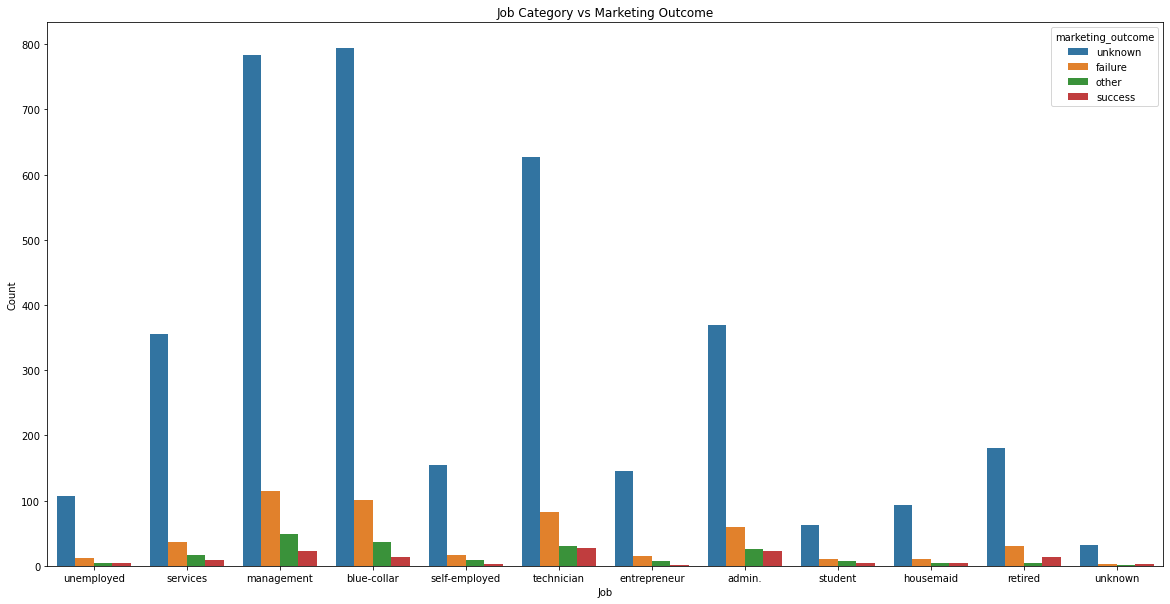

In [42]:
# job vs marketing_outcome
plt.figure(figsize=(20,10))
plt.title('Job Category vs Marketing Outcome')
sns.countplot(x='job', data=df, hue='marketing_outcome')
plt.xlabel('Job')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

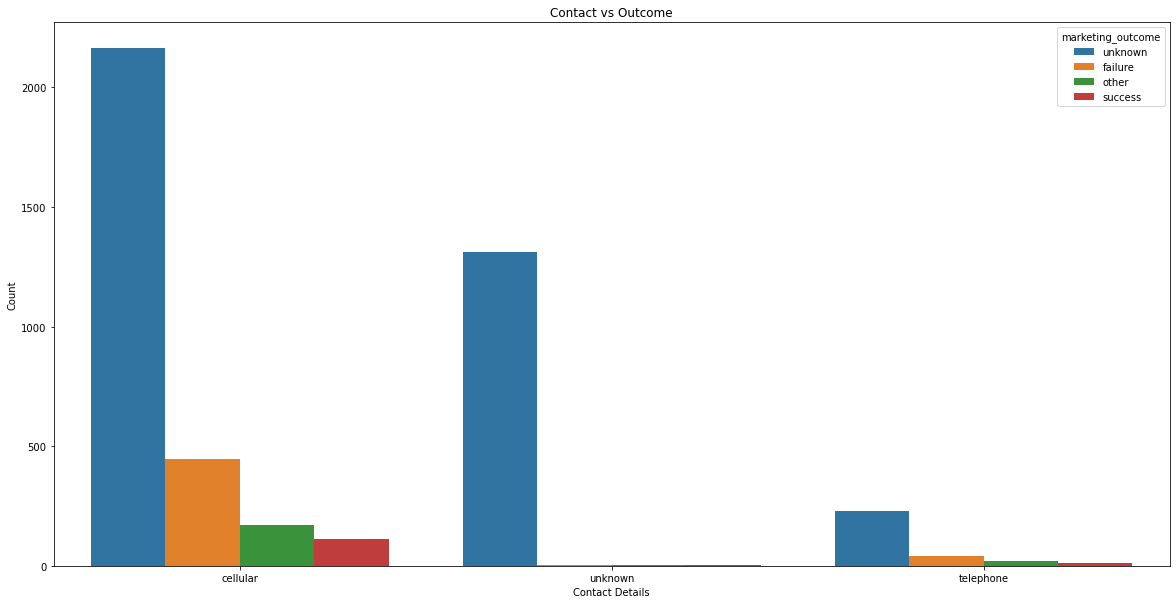

In [43]:
# marketing outcome vs contact
plt.figure(figsize=(20,10))
plt.title('Contact vs Outcome')
sns.countplot(x='contact', data=df, hue='marketing_outcome')
plt.xlabel('Contact Details')
plt.ylabel('Count')

Most of the clients were reached via the cellular.

In [102]:
# Balance vs Subscribed?
df['balance'].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [107]:
#Creating a function for the balance bracket

def balance_bracket(balance):
    if balance <= 0:
        return 'Bankrupt'
    elif balance <= 10000:
        return 'Managing'
    elif balance <= 20000:
        return 'Lower Mid-Class'
    elif balance <=30000:
        return 'Mid-Class'
    elif balance <= 40000:
        return 'Upper Mid-Class'
    elif balance <= 50000:
        return 'Rich'
    elif balance <=60000:
        return 'Super Rich'
    elif balance<= 70000:
        return 'Wealthy'
    else:
        return 'Billionaire(>70k)'
    
#Creating a new column for age category
df['balance_group'] = df['balance'].apply(balance_bracket)

Text(0, 0.5, 'Balance Group')

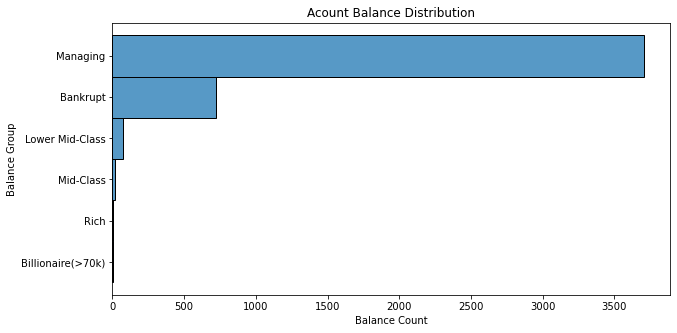

In [108]:
#Histogram plot for balance
plt.figure(figsize=(10,5))
plt.title('Acount Balance Distribution')
sns.histplot(y='balance_group', data=df)
plt.xlabel('Balance Count')
plt.ylabel('Balance Group')

This histogram was just to visualize my function.

Text(0, 0.5, 'Count')

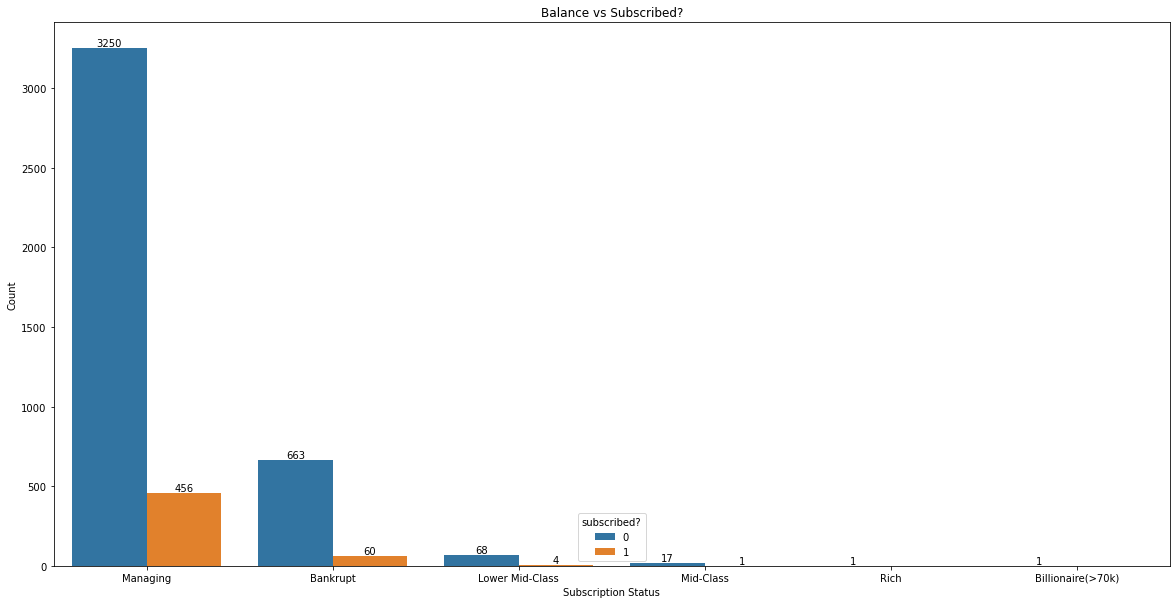

In [119]:
plt.figure(figsize=(20,10))
plt.title('Balance vs Subscribed?')
ax = sns.countplot(x='balance_group', data=df, hue='subscribed?')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Subscription Status')
plt.ylabel('Count')



From this bivariate visual, we can see and glean a number of things:
- most people are normally not interested in these term deposits,
- The people in the Managing group (<=10k balance) are the ones most likely to subscribe.
- the more mone people have in their balance, tey are less likely going to do a fixed deposit; maybe because they would rather coose to be investors.

## Multivariate Analysis


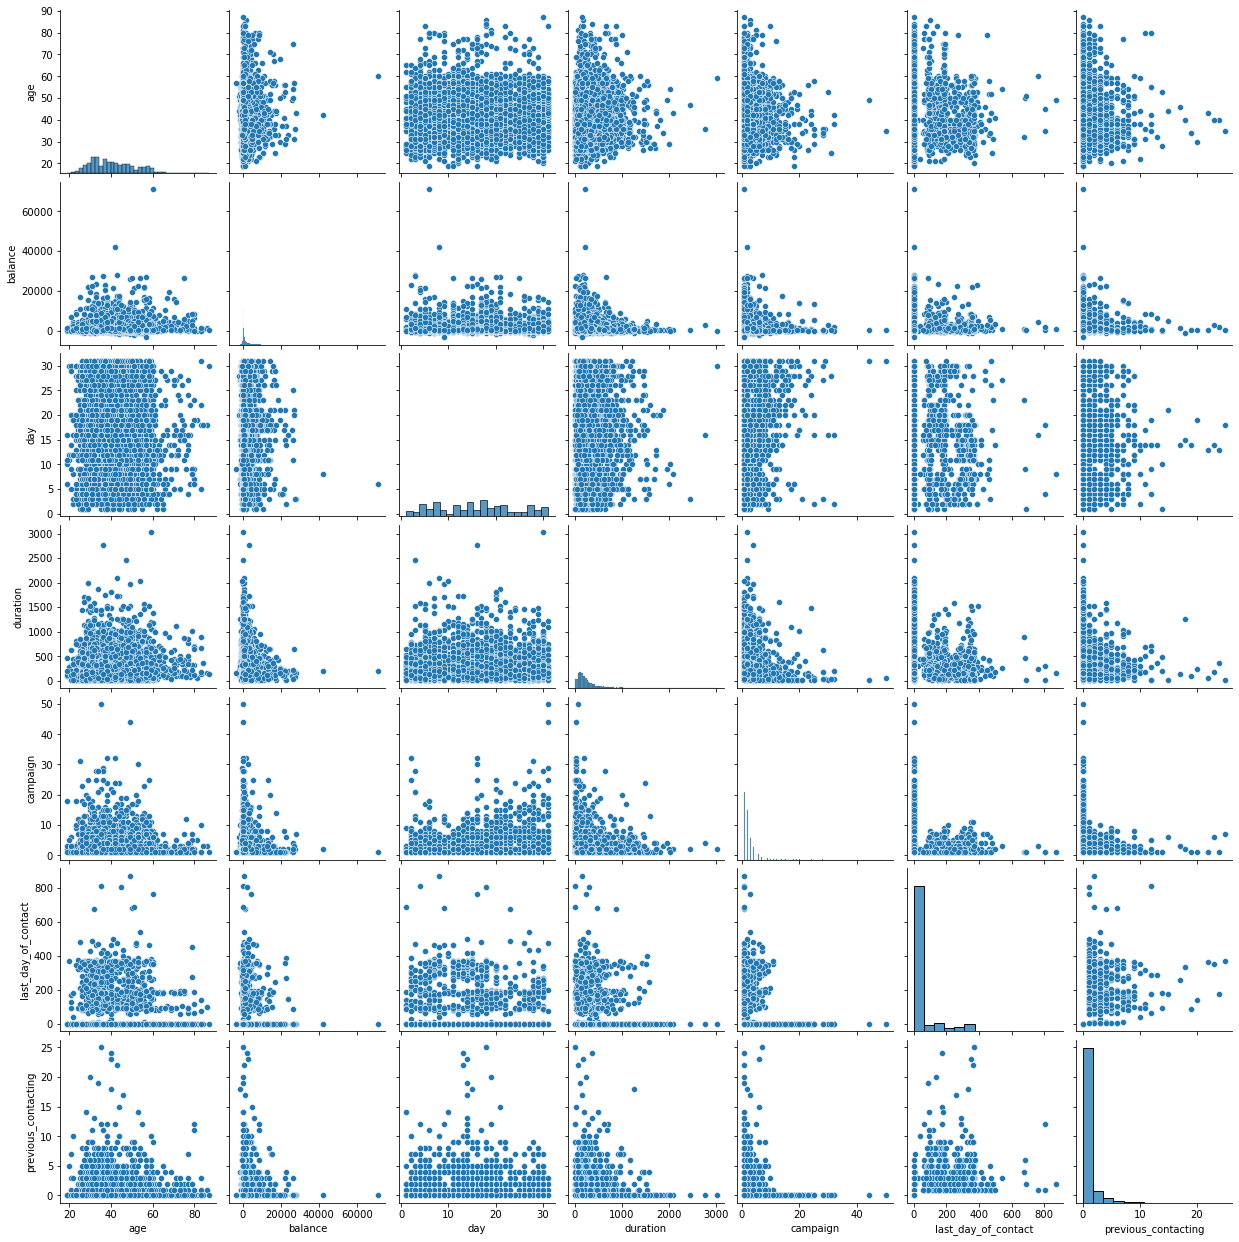

In [44]:
#multivariate analysis cells: Pairplot
sns.pairplot(df)


<AxesSubplot:>

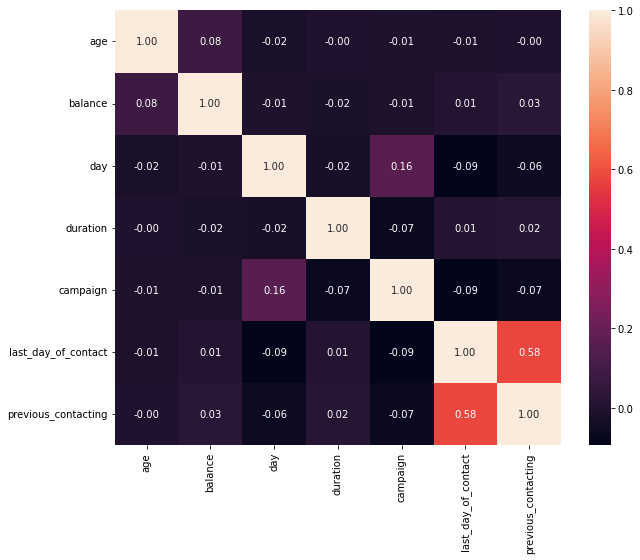

In [45]:
#Correlation
corel = df.corr()
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corel, annot=True, fmt='.2f')

There is a positive correlation between number of contacts performed before this campaign and number of days that passed by after the client was last contacted from a previous campaign. There rest showed negative correlation.

In [46]:
df.corr()

,age,balance,day,duration,campaign,last_day_of_contact,previous_contacting
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
last_day_of_contact,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous_contacting,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [47]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Older Youth(30-40)
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Older Youth(30-40)
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Older Youth(30-40)
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Older Youth(30-40)
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Adults(52-62)


# Summary of Findings

1. Management is the highest job type closely followed by blue-collar. Students and unknown represent the least job type.
2. Most of the customers in management positions have tertiary eduction background.
3. There is a positive correlation between number of contacts performed before this campaign and number of days that passed by after the client was last contacted from a previous campaign.

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [48]:
y = df['subscribed?']
#y represents the target - the other y in bracket was the name of the column

In [49]:
y.head()

1    no
2    no
3    no
4    no
5    no
Name: subscribed?, dtype: object

In [50]:
y.tail()

4517    no
4518    no
4519    no
4520    no
4521    no
Name: subscribed?, dtype: object

In [51]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Older Youth(30-40)
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Older Youth(30-40)
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Older Youth(30-40)
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Older Youth(30-40)
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Adults(52-62)


In [52]:
#replace values in subscribed? column to int
df['subscribed?'] = (df['subscribed?'] == 'yes').astype(int)

In [53]:
y = df['subscribed?']

In [54]:
df.head(15)

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0,Older Youth(30-40)
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0,Older Youth(30-40)
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,Older Youth(30-40)
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0,Older Youth(30-40)
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0,Adults(52-62)
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,0,Older Youth(30-40)
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,0,Older Youth(30-40)
8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,0,Older Youth(30-40)
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,0,Matured(41-51)
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,0,Matured(41-51)


In [55]:
y.head(2)

1    0
2    0
Name: subscribed?, dtype: int32

In [56]:
# replace housing loan and personal loan columns with no=0 and yes=1
df['housing_loan'] = (df['housing_loan'] == 'yes').astype(int)
df['personal_loan'] = (df['personal_loan'] == 'yes').astype(int)

In [57]:
df.head(15)

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,Older Youth(30-40)
2,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,0,Older Youth(30-40)
3,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,Older Youth(30-40)
4,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,Older Youth(30-40)
5,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,Adults(52-62)
6,35,management,single,tertiary,no,747,0,0,cellular,23,feb,141,2,176,3,failure,0,Older Youth(30-40)
7,36,self-employed,married,tertiary,no,307,1,0,cellular,14,may,341,1,330,2,other,0,Older Youth(30-40)
8,39,technician,married,secondary,no,147,1,0,cellular,6,may,151,2,-1,0,unknown,0,Older Youth(30-40)
9,41,entrepreneur,married,tertiary,no,221,1,0,unknown,14,may,57,2,-1,0,unknown,0,Matured(41-51)
10,43,services,married,primary,no,-88,1,1,cellular,17,apr,313,1,147,2,failure,0,Matured(41-51)


In [58]:
# Selecting categorical variables
features = ['job', 'marital','education','default','contact', 'month', 'marketing_outcome', 'age_group']

In [59]:
#  use pd.get_dummies() for one hot encoding
category_dummies = pd.get_dummies(df[features])
category_dummies.head(10)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adults(52-62),age_group_Aged(74-84),age_group_Matured(41-51),age_group_Older Adults(63-73),age_group_Older Youth(30-40),age_group_Silver Tops(>85),age_group_Youth(19-29)
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
#joining the encoded variables back to the main dataframe using pd.concat()
df = pd.concat([df,category_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adults(52-62),age_group_Aged(74-84),age_group_Matured(41-51),age_group_Older Adults(63-73),age_group_Older Youth(30-40),age_group_Silver Tops(>85),age_group_Youth(19-29)
1,30,unemployed,married,primary,no,1787,0,0,cellular,19,...,0,0,1,0,0,0,0,1,0,0
2,33,services,married,secondary,no,4789,1,1,cellular,11,...,0,0,0,0,0,0,0,1,0,0
3,35,management,single,tertiary,no,1350,1,0,cellular,16,...,0,0,0,0,0,0,0,1,0,0
4,30,management,married,tertiary,no,1476,1,1,unknown,3,...,0,0,1,0,0,0,0,1,0,0
5,59,blue-collar,married,secondary,no,0,1,0,unknown,5,...,0,0,1,1,0,0,0,0,0,0


In [61]:
#removing the initial categorical columns now that we have encoded them
#use the list called category do delete all the initially selected columns at once


df = df.drop(features,axis=1)
df.head()

,age,balance,housing_loan,personal_loan,day,duration,campaign,last_day_of_contact,previous_contacting,subscribed?,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adults(52-62),age_group_Aged(74-84),age_group_Matured(41-51),age_group_Older Adults(63-73),age_group_Older Youth(30-40),age_group_Silver Tops(>85),age_group_Youth(19-29)
1,30,1787,0,0,19,79,1,-1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,4789,1,1,11,220,1,339,4,0,...,0,0,0,0,0,0,0,1,0,0
3,35,1350,1,0,16,185,1,330,1,0,...,0,0,0,0,0,0,0,1,0,0
4,30,1476,1,1,3,199,4,-1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,59,0,1,0,5,226,1,-1,0,0,...,0,0,1,1,0,0,0,0,0,0


## Select Features

In [62]:
X = df.drop('subscribed?', axis=1)

In [63]:
X.head()

,age,balance,housing_loan,personal_loan,day,duration,campaign,last_day_of_contact,previous_contacting,job_admin.,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adults(52-62),age_group_Aged(74-84),age_group_Matured(41-51),age_group_Older Adults(63-73),age_group_Older Youth(30-40),age_group_Silver Tops(>85),age_group_Youth(19-29)
1,30,1787,0,0,19,79,1,-1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,4789,1,1,11,220,1,339,4,0,...,0,0,0,0,0,0,0,1,0,0
3,35,1350,1,0,16,185,1,330,1,0,...,0,0,0,0,0,0,0,1,0,0
4,30,1476,1,1,3,199,4,-1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,59,0,1,0,5,226,1,-1,0,0,...,0,0,1,1,0,0,0,0,0,0


## Import ML algorithms and initialize them

In [64]:
#import ML algorithms
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.svm as svm

# Ml metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To disbale warning
import warnings
warnings.filterwarnings('ignore')

In [65]:
LR= LogisticRegression()
KN = KNeighborsClassifier()
RF = RandomForestClassifier()
SVM = svm.LinearSVC()

In [66]:
models = [LR,KN,RF,SVM]

## Train Test Split

In [67]:
# Split into training and testing with split ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
print('\n',X_train.head(4))
print('\n',X_test.head(4))
print('\n',y_train.head(4))
print('\n',y_test.head(4))


       age  balance  housing_loan  personal_loan  day  duration  campaign  \
2183   43      104             1              0   18       635         3   
889    43      757             1              0    9       315         4   
2917   32    10218             1              0   19       149         2   
3795   43     3274             1              0   22       680         1   

      last_day_of_contact  previous_contacting  job_admin.  ...  \
2183                   -1                    0           0  ...   
889                    -1                    0           0  ...   
2917                   -1                    0           1  ...   
3795                   95                    1           0  ...   

      marketing_outcome_other  marketing_outcome_success  \
2183                        0                          0   
889                         0                          0   
2917                        0                          0   
3795                        0            

In [69]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [70]:
from sklearn.metrics import confusion_matrix

This is a visual representation of what happens when you split, in order to test and train your model.

## Train and Test the models


For LogisticRegression, Accuracy score is 0.8861878453038674 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       790
           1       0.67      0.21      0.32       115

    accuracy                           0.89       905
   macro avg       0.78      0.60      0.63       905
weighted avg       0.87      0.89      0.86       905



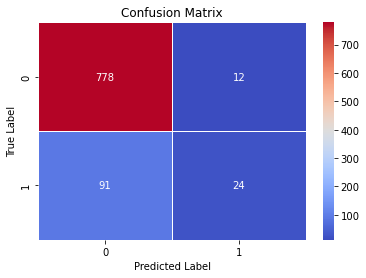


For KNeighborsClassifier, Accuracy score is 0.8607734806629834 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       790
           1       0.39      0.17      0.23       115

    accuracy                           0.86       905
   macro avg       0.64      0.56      0.58       905
weighted avg       0.82      0.86      0.84       905



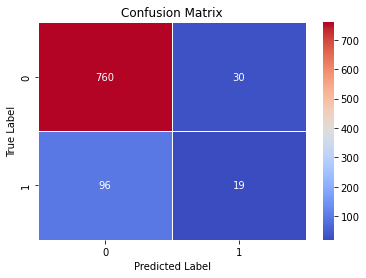


For RandomForestClassifier, Accuracy score is 0.8861878453038674 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       790
           1       0.68      0.20      0.31       115

    accuracy                           0.89       905
   macro avg       0.79      0.59      0.62       905
weighted avg       0.87      0.89      0.86       905



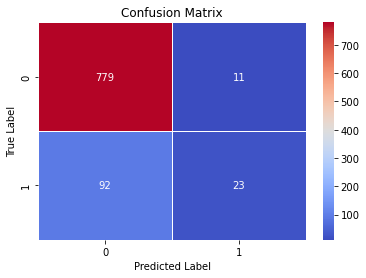


For LinearSVC, Accuracy score is 0.8906077348066298 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       790
           1       0.68      0.26      0.38       115

    accuracy                           0.89       905
   macro avg       0.79      0.62      0.66       905
weighted avg       0.87      0.89      0.87       905



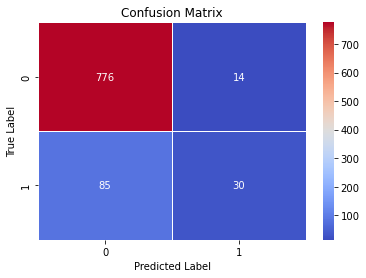

In [71]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
    #fit your model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

### Model Optimization

In [72]:
# import model for scaling
from sklearn.preprocessing import StandardScaler

In [73]:
# scale train data
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [74]:
# scale test data
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [75]:
L= LogisticRegression()
K = KNeighborsClassifier()
R = RandomForestClassifier()
S = svm.LinearSVC()

In [76]:
my_model= [L,K,R,S]

In [77]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [78]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
    #fit your model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    



For LogisticRegression, Accuracy score is 0.8972375690607735 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       790
           1       0.70      0.33      0.45       115

    accuracy                           0.90       905
   macro avg       0.81      0.66      0.70       905
weighted avg       0.88      0.90      0.88       905



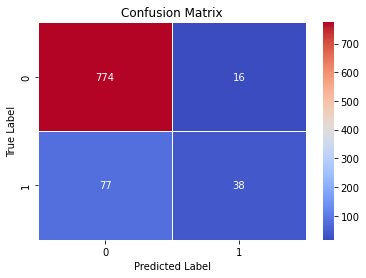


For KNeighborsClassifier, Accuracy score is 0.8850828729281768 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       790
           1       0.69      0.17      0.28       115

    accuracy                           0.89       905
   macro avg       0.79      0.58      0.61       905
weighted avg       0.87      0.89      0.85       905



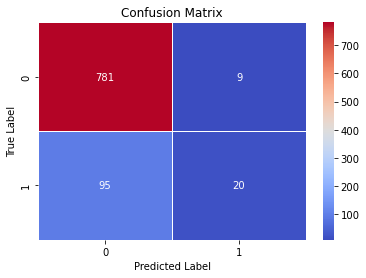


For RandomForestClassifier, Accuracy score is 0.8883977900552487 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       790
           1       0.71      0.21      0.32       115

    accuracy                           0.89       905
   macro avg       0.80      0.60      0.63       905
weighted avg       0.87      0.89      0.86       905



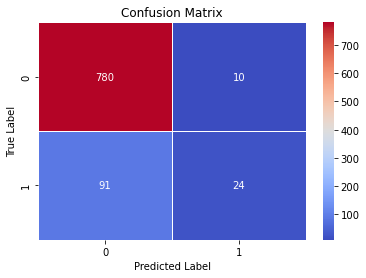


For LinearSVC, Accuracy score is 0.8983425414364641 

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       790
           1       0.76      0.30      0.42       115

    accuracy                           0.90       905
   macro avg       0.83      0.64      0.68       905
weighted avg       0.89      0.90      0.88       905



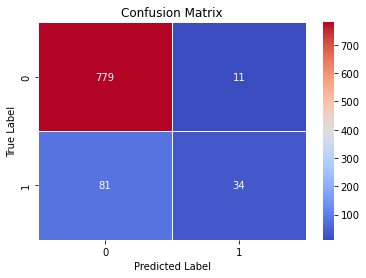

In [79]:
#loop through each model
for model in my_model:
    my_train(model,X_train,y_train,X_test,y_test)

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

- Based on the various algorithms used, we can see the various **accuracy scores** which tells us how accurate our model is, but this is only considered when the target class is balanced. In this dataset, the ratio of customers that will not subscribe to term deposit and those that will subscribe to term deposit is 4000:521 respectively. So using only accuracy to evaluate our model will not be a good idea as the model with be biased and make accurate predictions about the larger part of the dataset.


- With regards to **precision** it is a measure of the probability that our model is able to accurately predict that customers will subscribe to term deposit. This has to do with predictions that we get correct but actually are false.


- **Recall** on the other hand, is considered when you have to correctly predict an event that has occured already. It has to do with false predictions when actually they are correct.


In this case, we are considering the model with the highest accuracy and streamline down to precision and recall. Choosing a model with a higher **precision** is better because with regards to customers subscribing to the term deposit, we want to target those that will subscribe and by so doing help the business not to loose money in targeting customers that won't subscribe. 

However, if we predict that customers will not subscribe and they eventually subscribe, it wont be a loss to the business. This is where recall comes in.

## Summary

What model should be deployed to production?
Any other comments?

The preferred metric is Precision. This is because 1s are the desired outcome for this bank's product uptake campaign. So our model with the highest True Positive (TP) potential will be our pick. Choosing the correct metric for our model can actually increase its predictive power and give us a great competitive advantage.

The model that should be deployed to production is Support Vector Machine (SVM) model as it has the highest accuracy and precision. The precision is a bit low and by optimizing and tuning our model we can get a more higher precision.

- Normally, accuracy is not the best method for evaluating a model when either a 1 or 0 is preferred rather than both, hence I am not using the accuracy confusion matrix in this case; neither will I utilize the recall score because it only considers the real values.

- Generally, their subscription campaign doesn't get a lot of positive results, and most of the valid results were left as 'Unknown'. Below are the value count statistic:
   - unknown    3705
   - failure     490
   - other       197
   - success     129
   
### By observation, most of the people who obviously subscribed have a positive account balance.

From this bivariate visual, we can see and glean a number of things:
- most people are normally not interested in these term deposits,
- The people in the Managing group (<=10k balance) are the ones most likely to subscribe.
- the more money people have in their balance, they are less likely going to do a fixed deposit; maybe because they would rather choose to be investors.